In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/air-pollution-dataset/Air_Quality.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/kaggle/input/air-pollution-dataset/Air_Quality.csv')

In [4]:
data.head(10)

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
0,172653,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,203,Bedford Stuyvesant - Crown Heights,Annual Average 2011,12/01/2010,25.30,NaN
1,172585,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,203,Bedford Stuyvesant - Crown Heights,Annual Average 2009,12/01/2008,26.93,NaN
2,336637,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,204,East New York,Annual Average 2015,01/01/2015,19.09,NaN
3,336622,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,103,Fordham - Bronx Pk,Annual Average 2015,01/01/2015,19.76,NaN
4,172582,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,104,Pelham - Throgs Neck,Annual Average 2009,12/01/2008,22.83,NaN
5,667327,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,104,Pelham - Throgs Neck,Annual Average 2020,01/01/2020,16.19,NaN
6,172607,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,306308,Chelsea-Village,Annual Average 2009,12/01/2008,38.16,NaN
7,172675,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,306308,Chelsea-Village,Annual Average 2011,12/01/2010,34.96,NaN
8,175345,375,Nitrogen dioxide (NO2),Mean,ppb,UHF42,206,Borough Park,Winter 2010-11,12/01/2010,30.10,NaN
9,176689,375,Nitrogen dioxide (NO2),Mean,ppb,UHF42,206,Borough Park,Annual Average 2013,12/01/2012,20.23,NaN


In [5]:
data.tail(10)

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
16208,602701,375,Nitrogen dioxide (NO2),Mean,ppb,Borough,5,Staten Island,Winter 2017-18,12/01/2017,18.92,NaN
16209,221842,386,Ozone (O3),Mean,ppb,UHF34,205,Sunset Park,Summer 2014,06/01/2014,30.60,NaN
16210,171567,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,205,Sunset Park,Winter 2008-09,12/01/2008,30.17,NaN
16211,211560,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,205,Sunset Park,Winter 2013-14,12/01/2013,27.68,NaN
16212,130834,648,Asthma emergency department visits due to PM2.5,Estimated annual rate (under age 18),"per 100,000 children",Borough,5,Staten Island,2005-2007,01/01/2005,55.30,NaN
16213,130750,647,Outdoor Air Toxics - Formaldehyde,Annual average concentration,µg/m3,UHF42,211,Williamsburg - Bushwick,2005,01/01/2005,3.10,NaN
16214,130780,647,Outdoor Air Toxics - Formaldehyde,Annual average concentration,µg/m3,Borough,5,Staten Island,2005,01/01/2005,2.30,NaN
16215,131020,652,Cardiac and respiratory deaths due to Ozone,Estimated annual rate,"per 100,000",UHF42,504,South Beach - Tottenville,2005-2007,01/01/2005,7.50,NaN
16216,131026,652,Cardiac and respiratory deaths due to Ozone,Estimated annual rate,"per 100,000",Borough,5,Staten Island,2005-2007,01/01/2005,7.80,NaN
16217,325247,643,Annual vehicle miles traveled,million miles,per km2,CD,107,Upper West Side (CD7),2016,01/01/2016,50.00,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16218 entries, 0 to 16217
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unique ID       16218 non-null  int64  
 1   Indicator ID    16218 non-null  int64  
 2   Name            16218 non-null  object 
 3   Measure         16218 non-null  object 
 4   Measure Info    16218 non-null  object 
 5   Geo Type Name   16218 non-null  object 
 6   Geo Join ID     16218 non-null  int64  
 7   Geo Place Name  16218 non-null  object 
 8   Time Period     16218 non-null  object 
 9   Start_Date      16218 non-null  object 
 10  Data Value      16218 non-null  float64
 11  Message         0 non-null      float64
dtypes: float64(2), int64(3), object(7)
memory usage: 1.5+ MB


In [7]:
# delete column message

del data['Message']

In [8]:
data

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value
0,172653,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,203,Bedford Stuyvesant - Crown Heights,Annual Average 2011,12/01/2010,25.30
1,172585,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,203,Bedford Stuyvesant - Crown Heights,Annual Average 2009,12/01/2008,26.93
2,336637,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,204,East New York,Annual Average 2015,01/01/2015,19.09
3,336622,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,103,Fordham - Bronx Pk,Annual Average 2015,01/01/2015,19.76
4,172582,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,104,Pelham - Throgs Neck,Annual Average 2009,12/01/2008,22.83
...,...,...,...,...,...,...,...,...,...,...,...
16213,130750,647,Outdoor Air Toxics - Formaldehyde,Annual average concentration,µg/m3,UHF42,211,Williamsburg - Bushwick,2005,01/01/2005,3.10
16214,130780,647,Outdoor Air Toxics - Formaldehyde,Annual average concentration,µg/m3,Borough,5,Staten Island,2005,01/01/2005,2.30
16215,131020,652,Cardiac and respiratory deaths due to Ozone,Estimated annual rate,"per 100,000",UHF42,504,South Beach - Tottenville,2005-2007,01/01/2005,7.50
16216,131026,652,Cardiac and respiratory deaths due to Ozone,Estimated annual rate,"per 100,000",Borough,5,Staten Island,2005-2007,01/01/2005,7.80


In [9]:
data.describe()

,Unique ID,Indicator ID,Geo Join ID,Data Value
count,16218.000000,16218.000000,1.621800e+04,16218.000000
mean,372730.417746,427.803613,6.097103e+05,19.975917
std,215507.613560,110.921411,7.893388e+06,21.322349
min,121644.000000,365.000000,1.000000e+00,0.000000
25%,173211.250000,365.000000,2.020000e+02,9.050000
50%,325262.500000,375.000000,3.030000e+02,15.300000
75%,605270.750000,386.000000,4.040000e+02,26.037500
max,799868.000000,661.000000,1.051061e+08,424.700000


# Follow this question :

* Analyzing trends in air pollution over time.

* Identifying geographical areas with consistently poor air quality.

* Assessing the effectiveness of air quality management and pollution reduction policies.

* Correlating air quality data with public health outcomes.

# Analyzing trends in air pollution over time.

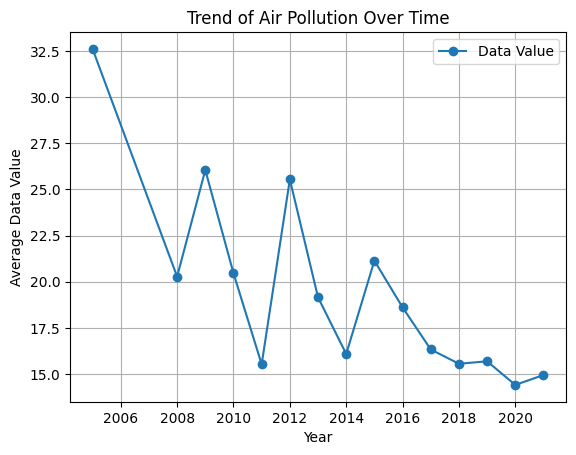

In [10]:
# Convert Start_Date to datetime format if not already
data['Start_Date'] = pd.to_datetime(data['Start_Date'])

# Extract year from Start_Date for trend analysis
data['Year'] = data['Start_Date'].dt.year

# Group data by Year and calculate mean Data Value for each year
grouped_data = data.groupby('Year')['Data Value'].mean().reset_index()

# Plotting the trend
grouped_data.plot(x='Year', y='Data Value', kind='line', marker='o', title='Trend of Air Pollution Over Time')
plt.ylabel('Average Data Value')
plt.grid(True)
plt.show()

# Identifying geographical areas with consistently poor air quality.

In [11]:
# Group data by Geo Place Name and calculate mean Data Value for each place
grouped_geo_data = data.groupby('Geo Place Name')['Data Value'].mean().sort_values(ascending=False).reset_index()

# Display the top 10 places with the highest average Data Value
grouped_geo_data.head(10)

,Geo Place Name,Data Value
0,High Bridge - Morrisania,37.160333
1,Hunts Point - Mott Haven,36.039533
2,Crotona -Tremont,35.032400
3,East Harlem,32.314876
4,Central Harlem - Morningside Heights,32.109339
5,Bronx,29.798446
6,Manhattan,28.249595
7,Gramercy Park - Murray Hill,26.928600
8,Union Square - Lower East Side,26.902467
9,Chelsea - Clinton,26.548733


# Assessing the effectiveness of air quality management and pollution reduction policies.

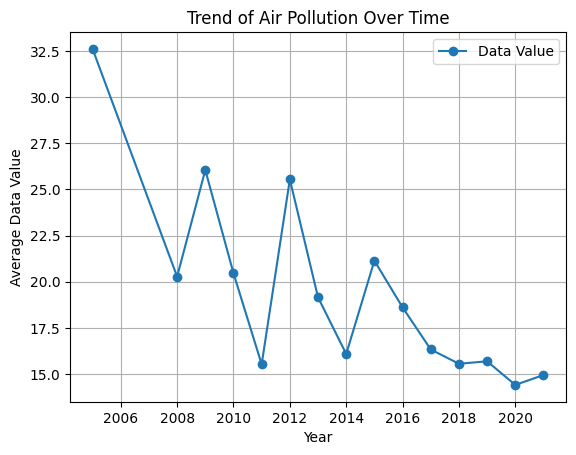

In [12]:
grouped_data.plot(x='Year', y='Data Value', kind='line', marker='o', title='Trend of Air Pollution Over Time')
plt.ylabel('Average Data Value')
plt.xlabel('Year')
plt.grid(True)
plt.show()

# Correlating air quality data with public health outcomes.

In [13]:
# There's no direct public health outcomes data in the current dataset.
# To simulate an analysis that correlates air quality data with public health outcomes,
# let's create a synthetic dataset that represents public health outcomes.
# This synthetic dataset will include hypothetical data on respiratory problems rates per 100,000 people.

import numpy as np
import pandas as pd

# Seed for reproducibility
np.random.seed(42)

# Creating a synthetic dataset for public health outcomes
public_health_data = pd.DataFrame({
    'Year': np.arange(2005, 2021),
    'Respiratory_Problems_Rate': np.random.randint(100, 500, size=16)
})

public_health_data

,Year,Respiratory_Problems_Rate
0,2005,202
1,2006,448
2,2007,370
3,2008,206
4,2009,171
5,2010,288
6,2011,120
7,2012,202
8,2013,221
9,2014,314


In [14]:
# Merging the air quality data (grouped_data) with the synthetic public health data
# This will allow us to analyze the correlation between air pollution and respiratory problems rates.

merged_data = pd.merge(grouped_data, public_health_data, on='Year', how='inner')

# Calculating the correlation between 'Data Value' (air pollution) and 'Respiratory_Problems_Rate'
correlation = merged_data[['Data Value', 'Respiratory_Problems_Rate']].corr()

correlation

,Data Value,Respiratory_Problems_Rate
Data Value,1.000000,-0.283948
Respiratory_Problems_Rate,-0.283948,1.000000


* The correlation between air pollution and the rate of respiratory problems is approximately -0.28, indicating a weak inverse relationship in this synthetic analysis